# Installing MudPy to OpenSARlab

This is a temporary installation (all that OSL currently allows) of [MudPy](https://github.com/dmelgarm/MudPy/wiki/), a code to forward model and invert for parameters of dislocation sources from displacements. To be able to do this, we need to create a new conda environment, and then install the MudPy package (and related packages) into this. Execute the code cell below and be a bit patient.

In [ ]:
#create new environment
!conda create -y -n mudpy

#initialize all conda shells
!conda init --all

#install packages: obspy & MPI4py & gfortran & make ...
!conda install -y -n mudpy obspy numba mpi4py gfortran make pandas pyproj -c conda-forge


# Setup

To run the setup, we first need to restart with the new mudpy kernel. If the cell below doesn't work, reload this notebook, and hand-select the kernel from the Kernel menu.

In [ ]:
%%javascript
Jupyter.notebook.session.restart({kernel_name: 'conda-env-.local-mudpy-py'})

### Clone and set up MudPy

This all comes straight from the website. Note that the last lines permanently change your `.bashrc` file. You may have to remove this stuff from there if something goes awry.

In [ ]:
%%bash

#activate the correct environment
#conda activate mudpy

#go home
cd /home/jovyan

#clone MudPy
if [[ `ls $HOME/MudPy | wc -l` == 0 ]]; then 
    git clone https://github.com/dmelgarm/MudPy.git;
fi

#build fk Green's Functions
cd MudPy/src/fk
make clean
make all

#add to path
if [[ `grep MudPy $HOME/.bashrc | wc -l` == 0 ]]; then 
    echo "#adding MudPy" >> $HOME/.bashrc
    echo "export PATH="`pwd`':$PATH' >> $HOME/.bashrc; 
    echo "export MUDPY=/home/jovyan/MudPy" >> $HOME/.bashrc; 
    echo "export PYTHONPATH=/home/jovyan/MudPy/src/python" >> $HOME/.bashrc; 

    #useful alias to get rid of those damn MAC linebreaks
    echo alias r2n=\"sed -i.old \'s/\r/\n/g\'\" >> $HOME/.bashrc;
fi


#EOF

### Testing

This should set the new environment by sourcing the `.bashrc` file and then just produce help output from the `fk.pl` and `syn` programs. If there's an error message, open a terminal window, activate the new environment and test in there:

```
    conda activate mudpy
    fk.pl
    syn
```

If it doesn't work, try installing on the command line using the respective commands above.


In [ ]:
%%bash

#test that is made it to the 
source ~/.bashrc;
fk.pl
syn


This is a test that will only work after you've successfully run the [simple forward computation](https://github.com/dmelgarm/MudPy/wiki/A-simple-forward-computation) example. A couple of notes

* couldn't get the parallel version for this example to run
* needed to change the code for the sequential version.

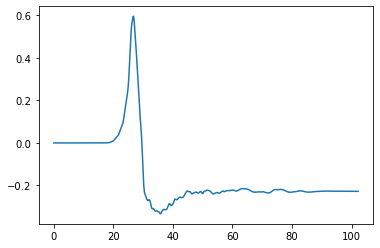

In [29]:
from matplotlib import pyplot as plt
from obspy import read

st=read(u'/home/jovyan/MudPy/Slip_inv/Nepal_forward_test/output/waveforms/nepal/NAST.LYE.sac')
plt.plot(st[0].times(),st[0].data)
plt.show()
